## INFS 772 Programming for Data Analytics Spring 2019
## Assignment 3: Visualization with seaborn and K-nearest neighbors with scikit-learn (total 20 points)

## Due Friday, March 29, 11:59pm
### The coding requirements are for 14 points.
### All easily avoidable runtime errors would lead to additional point reductions.
### Parameter Tuning with Cross Validation (5 extra credits)

#### Hints: 
- There is a youtube video (link is on D2L) for the scikit-learn part
- Visualization of the iris dataset with seaborn is also on D2L

## Agenda

1. Review of the iris dataset
2. Visualizing the iris dataset with Matplotlib and Seaborn
3. K-nearest neighbors (KNN) classification
4. Review of supervised learning
5. Benefits and drawbacks of scikit-learn
6. Requirements for working with data in scikit-learn
7. scikit-learn's 4-step modeling pattern
8. Tuning a KNN model
9. Comparing KNN with other models

## Learning Objectives

1. Learn how the modeling process works
2. Learn how scikit-learn works
3. Learn how KNN works

## Review of the iris dataset
### You are required to download the dataset as a flat file directly from the Internet. (1 point)
### Rename the colums (1 point)

In [1]:
# read the iris data into a DataFrame
# from http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
# name the columns as 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'

import pandas as pd
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
columns_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=columns_names)

In [2]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Terminology

- **150 observations** (n=150): each observation is one iris flower
- **4 features** (p=4): sepal length, sepal width, petal length, and petal width
- **Response**: iris species
- **Classification problem** since response is categorical

## Human learning on the iris dataset

How did we (as humans) predict the species of an iris?

1. We observed that the different species had (somewhat) dissimilar measurements.
2. We focused on features that seemed to correlate with the response.
3. We created a set of rules (using those features) to predict the species of an unknown iris.

We assumed that if an **unknown iris** has measurements similar to **previous irises**, then its species is most likely the same as those previous irises.

In [3]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [4]:
# map each iris species to a number
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

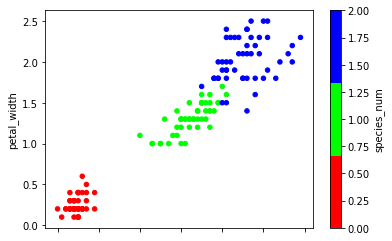

In [5]:
# create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap=cmap_bold)

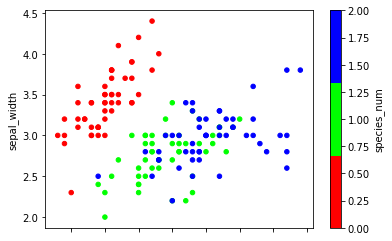

In [6]:
# create a scatter plot of SEPAL LENGTH versus SEPAL WIDTH and color by SPECIES
iris.plot(kind='scatter', x='sepal_length', y='sepal_width', c='species_num', colormap=cmap_bold)

## Reproduce the above with seaborn (1 point)
#### We'll use seaborn's FacetGrid to color the scatterplot by species

/Users/shahrukh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


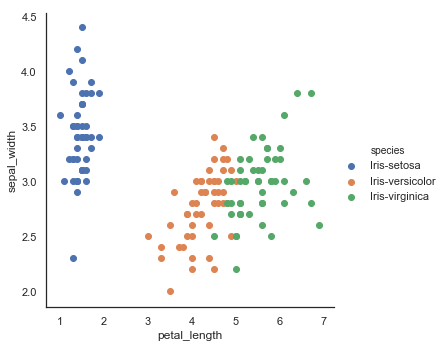

In [7]:
import seaborn as sns
sns.set(style='white', color_codes=True)

sns.FacetGrid(iris, hue='species', size=5) \
   .map(plt.scatter, "petal_length", "sepal_width") \
   .add_legend()



## kdeplot (1 point)

/Users/shahrukh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


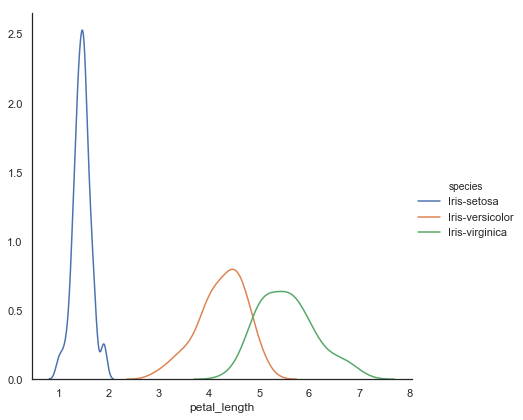

In [8]:
# A seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

# Your codes here
sns.FacetGrid(iris, hue='species', size=6) \
   .map(sns.kdeplot, 'petal_length') \
   .add_legend()

## Pair plots with seaborn (1 point)
#### Make sure species are in different colors

/Users/shahrukh/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


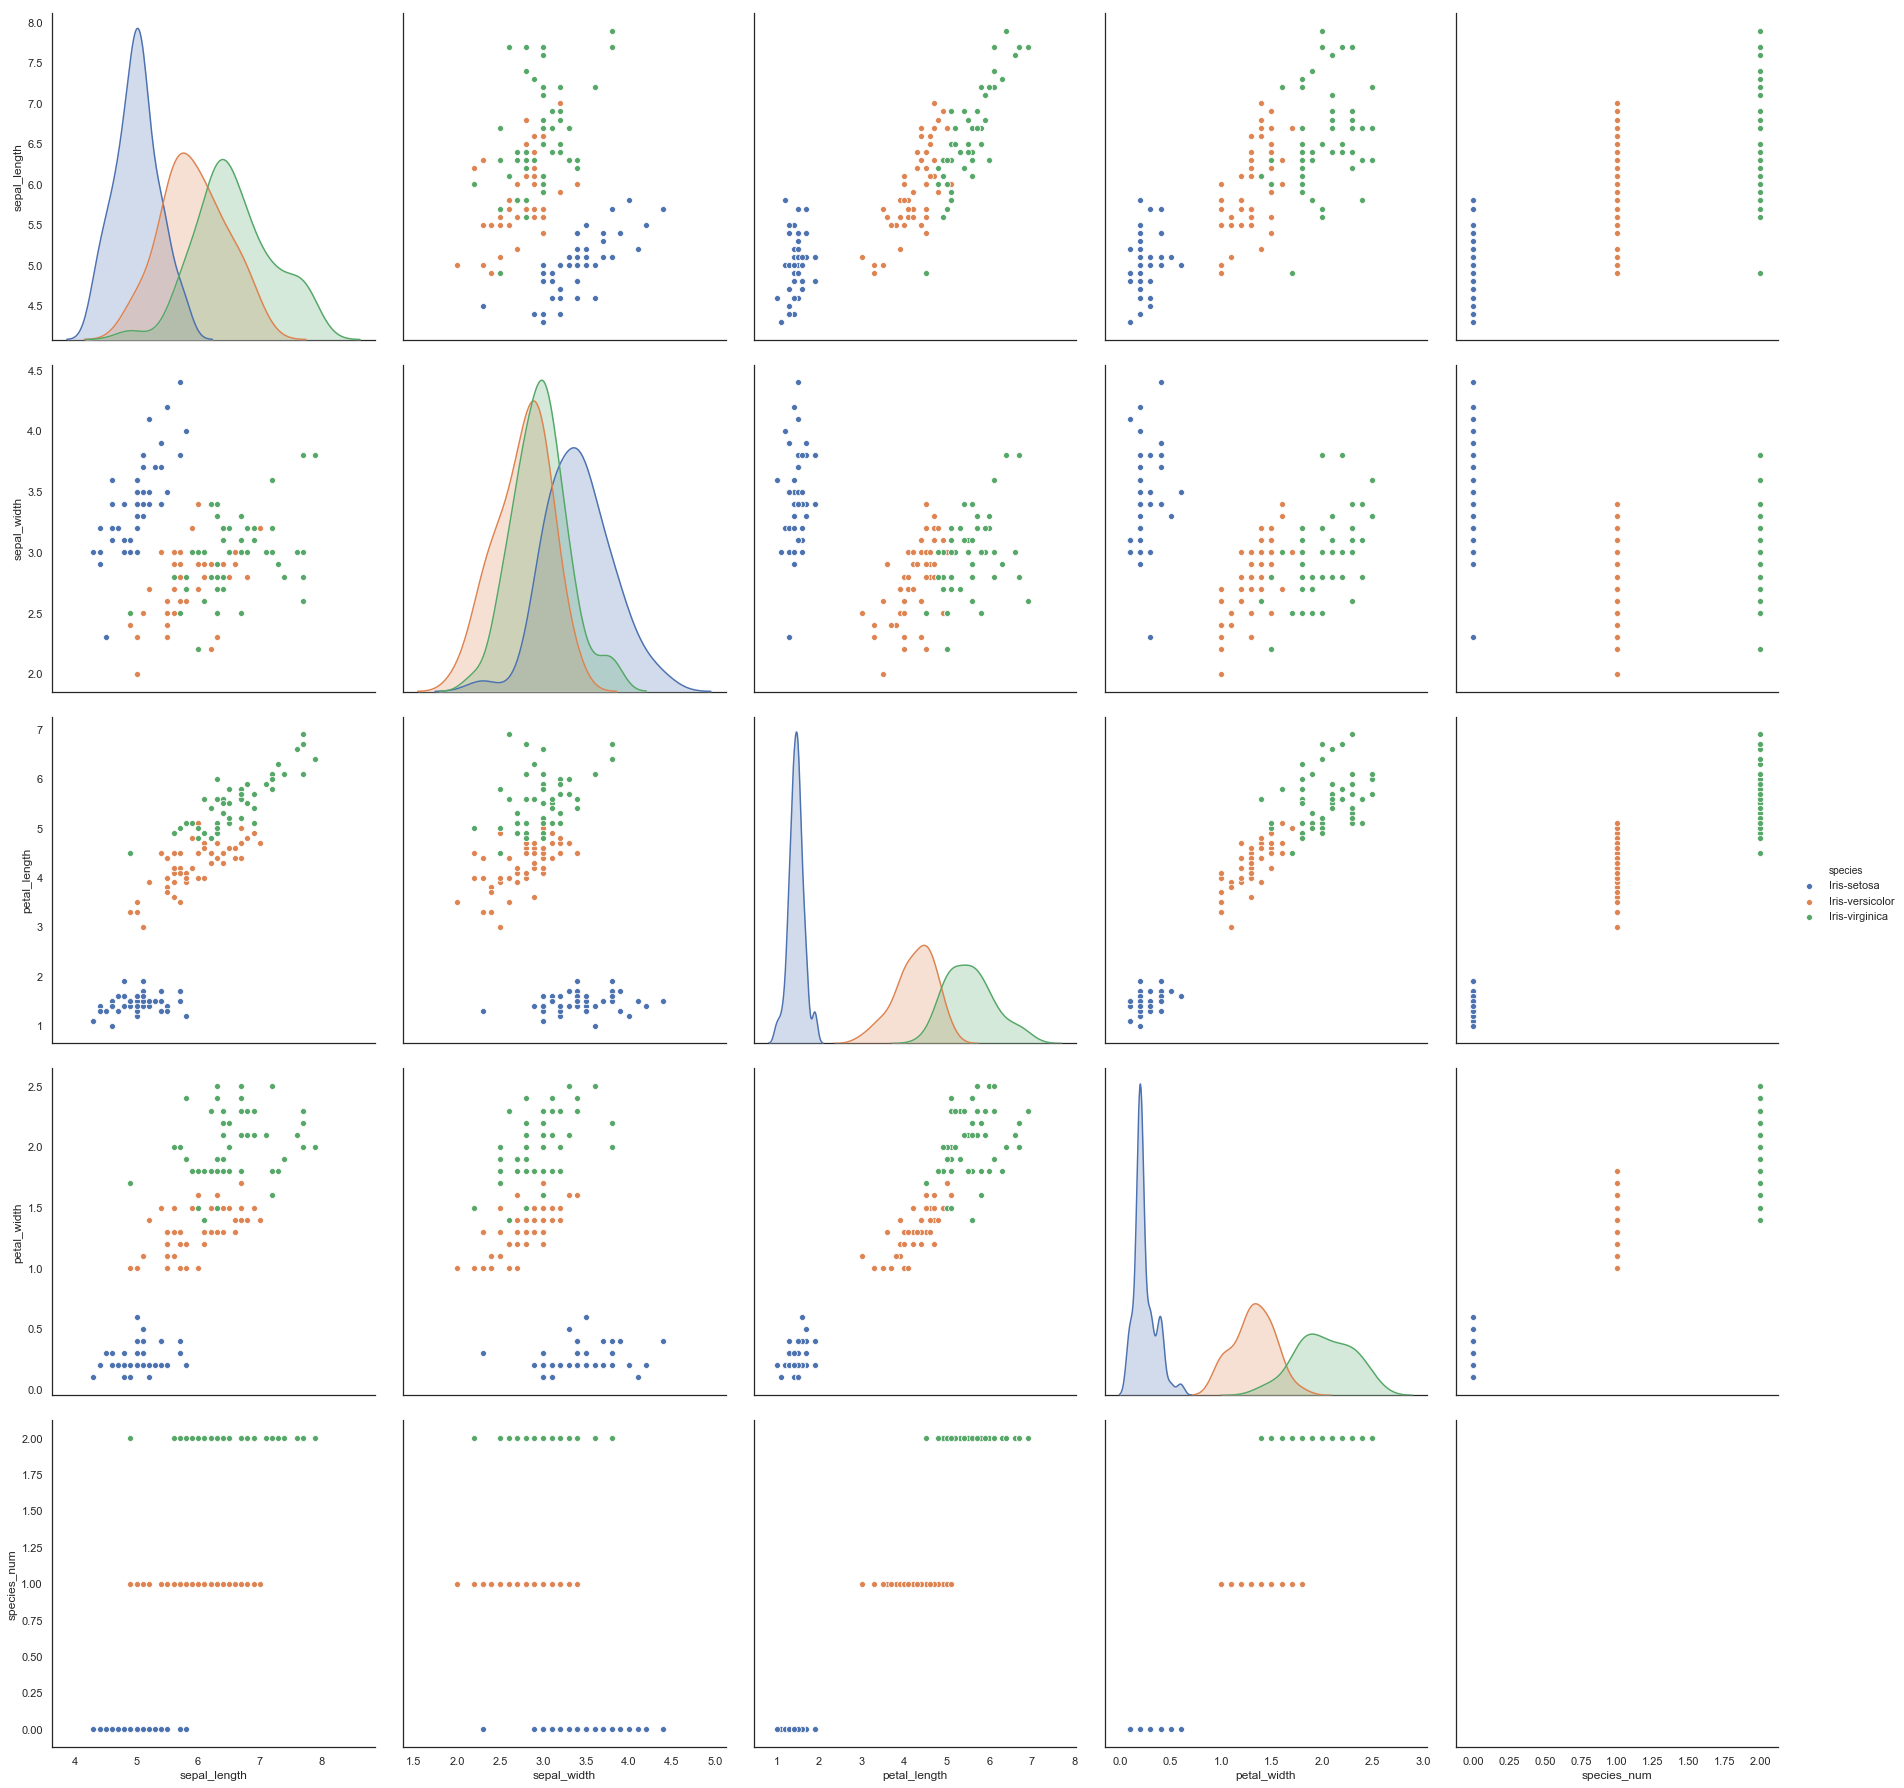

In [9]:
# Your codes here
sns.pairplot(iris, hue='species', size=5)

## Another multivariate visualization technique pandas has is parallel_coordinates (1 point)
#### Parallel coordinates plots each feature on a separate column & then draws lines connecting the features for each data sample

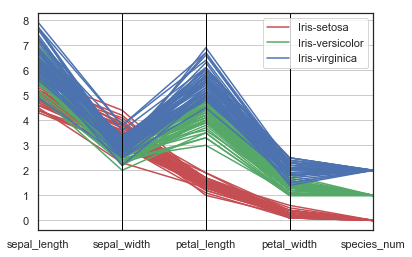

In [10]:
# Your codes here
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, 'species', color=['r','g','b'])

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the data that are "nearest" to the measurements of the unknown iris.
    - Euclidian distance is often used as the distance metric, but other metrics are allowed.
3. Use the most popular response value from the K "nearest neighbors" as the predicted response value for the unknown iris.

### KNN classification map for iris (K=1)

![1NN classification map](images/iris_01nn_map.png)

### KNN classification map for iris (K=5)

![5NN classification map](images/iris_05nn_map.png)

### KNN classification map for iris (K=15)

![15NN classification map](images/iris_15nn_map.png)

### KNN classification map for iris (K=50)

![50NN classification map](images/iris_50nn_map.png)

**Question:** What's the "best" value for K in this case?

**Answer:** The value which produces the most accurate predictions on **unseen data**. We want to create a model that generalizes!

## Review of supervised learning

![Supervised learning diagram](images/supervised_learning.png)

## Benefits and drawbacks of scikit-learn

**Benefits:**

- Consistent interface to machine learning models
- Provides many tuning parameters but with sensible defaults
- Exceptional documentation
- Rich set of functionality for companion tasks
- Active community for development and support

**Potential drawbacks:**

- Harder (than R) to get started with machine learning
- Less emphasis (than R) on model interpretability

Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

## Requirements for working with data in scikit-learn

1. Features and response should be **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily converted to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [28]:
# store feature matrix in "X"
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_cols]

In [29]:
# alternative ways to create "X"
X = iris.drop(['species', 'species_num'], axis=1)
X = iris.loc[:, 'sepal_length':'petal_width']
X = iris.iloc[:, 0:4]

In [30]:
# store response vector in "y"
y = iris.species_num

In [31]:
# check X's type
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [32]:
# check y's type
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [33]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

(150, 4)


In [34]:
# check y's shape (single dimension with length n)
print(y.shape)

(150,)


## scikit-learn's 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [35]:
from sklearn.neighbors import KNeighborsClassifier

## **Step 2:** "Instantiate" the "estimator" (1 point)

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [36]:
# make an instance of a KNeighborsClassifier object

# your code here
knn = KNeighborsClassifier(n_neighbors=1)
type(knn)

sklearn.neighbors.classification.KNeighborsClassifier

- Created an object that "knows" how to do K-nearest neighbors classification, and is just waiting for data
- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [37]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


## **Step 3:** Fit the model with data (aka "model training") (1 point)

- Model is "learning" the relationship between X and y in our "training data"
- Process through which learning occurs varies by model
- Occurs in-place

In [38]:
# fit the model with X and y

# your code here
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

- Once a model has been fit with data, it's called a "fitted model"

## **Step 4:** Predict the response for a new observation (1 point)

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

- Returns a NumPy array, and we keep track of what the numbers "mean"
- Can predict for multiple observations at once

In [39]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
# predict the class of X_new
# your code here
knn.predict(X_new)

array([2, 1])

## Tuning a KNN model (1 point each part, total 3 points here)

In [40]:
# instantiate the model (using the value K=5)

# your code here
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
# your code here
knn.fit(X,y)

# predict the response for new observations

# your code here
knn.predict(X_new)

array([1, 1])

**Question:** Which model produced the correct predictions for the two unknown irises?

**Answer:** We don't know, because these are **out-of-sample observations**, meaning that we don't know the true response values. Our goal with supervised learning is to build models that generalize to out-of-sample data. However, we can't truly measure how well our models will perform on out-of-sample data.

**Question:** Does that mean that we have to guess how well our models are likely to do?

**Answer:** Thankfully, no. In the next class, we'll discuss **model evaluation procedures**, which allow us to use our existing labeled data to estimate how well our models are likely to perform on out-of-sample data. These procedures will help us to tune our models and choose between different types of models.

## Calculate predicted probabilities of class membership (1 point)

In [41]:
# calculate predicted probabilities of class membership

# your code here
knn.predict_proba(X_new)

array([[0. , 0.8, 0.2],
       [0. , 1. , 0. ]])

## Print the Confusion Matrix (1 point)

Definition: number of samples of class $i$ predicted as class $j$.

In [42]:
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# your code here
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

## Parameter Tuning with Cross Validation (5 extra credits)
In this section, we’ll explore a method that can be used to tune the hyperparameter K.
Using the test set for hyperparameter tuning can lead to overfitting.
An alternative and smarter approach involves estimating the test error rate by holding out a subset of the training set from the fitting process. This subset, called the validation set, can be used to select the appropriate level of flexibility of our algorithm! There are different validation approaches that are used in practice, and we will be exploring one of the more popular ones called k-fold cross validation.
We’re going to perform a 10-fold cross validation on our dataset using a generated list of odd K’s ranging from 1 to 50.

In [43]:
from sklearn.model_selection import cross_val_score

# Your codes below
# creating odd list of K for KNN
k_odd = list(range(1,50,2))


# subsetting just the odd ones
k_odd = filter(lambda x : x % 2 != 0, k_odd)
k_odd

# empty list that will hold cv scores
cv_scores = []

from sklearn.model_selection import cross_val_score

# perform 10-fold cross validation
for k in k_odd:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy')
    cv_scores.append(scores.mean())

# print cv scores
print(cv_scores)

/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value 

[0.9422555764019179, 0.9418386491557224, 0.9583124869710234, 0.966645820304357, 0.966645820304357, 0.9583124869710234, 0.9583124869710234, 0.941635397123202, 0.941635397123202, 0.9335053158223889, 0.941635397123202, 0.9253752345215759, 0.941635397123202, 0.9335053158223889, 0.9335053158223889, 0.9335053158223889, 0.941635397123202, 0.9251719824890557, 0.9084948926412341, 0.9084948926412341, 0.8999478840942255, 0.8999478840942255, 0.8830779653950386, 0.8749478840942255, 0.8749478840942255]


/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/shahrukh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value 

## What is the optimal number of K? Your answer here!

## Comparing KNN with other models

**Advantages of KNN:**

- Simple to understand and explain
- Model training is fast
- Can be used for classification and regression

**Disadvantages of KNN:**

- Must store all of the training data
- Prediction phase can be slow when n is large
- Sensitive to irrelevant features
- Sensitive to the scale of the data
- Accuracy is (generally) not competitive with the best supervised learning methods